In [1]:
# Import libraries
import pandas as pd
import numpy as np
import janitor
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Import data

In [2]:
# Read in 2014-2019 dataset
df1 = pd.read_csv(r"C:\Users\klc90\my_python_projects\project_women_in_STEM\data\HESA\student_numbers_by_subject_and_sex_scotland\2014-2019.csv", header=17)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134380 entries, 0 to 134379
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Subject Area            134380 non-null  object
 1   First year marker       134380 non-null  object
 2   Level of study          134380 non-null  object
 3   Mode of study           134380 non-null  object
 4   Country of HE provider  134380 non-null  object
 5   Sex                     134380 non-null  object
 6   Academic Year           134380 non-null  object
 7   Number                  134380 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.2+ MB


In [3]:
df1

,Subject Area,First year marker,Level of study,Mode of study,Country of HE provider,Sex,Academic Year,Number
0,(1) Medicine & dentistry,All,All,Full-time,England,Female,2014/15,24835
1,(1) Medicine & dentistry,All,All,Full-time,England,Male,2014/15,19275
2,(1) Medicine & dentistry,All,All,Full-time,England,Other,2014/15,0
3,(1) Medicine & dentistry,All,All,Full-time,England,Total,2014/15,44110
4,(1) Medicine & dentistry,All,All,Full-time,England,Female,2015/16,25095
...,...,...,...,...,...,...,...,...
134375,Total,Other years,All undergraduate,Part-time,Wales,Total,2017/18,8755
134376,Total,Other years,All undergraduate,Part-time,Wales,Female,2018/19,4880
134377,Total,Other years,All undergraduate,Part-time,Wales,Male,2018/19,3860
134378,Total,Other years,All undergraduate,Part-time,Wales,Other,2018/19,5


### Clean and Prep

In [4]:
# Headers to snakecase
df1_clean = df1.clean_names()

In [5]:
# View unique values in each column to see what can be filtered
print(df1_clean["subject_area"].unique())
print(df1_clean["first_year_marker"].unique())
print(df1_clean["level_of_study"].unique())
print(df1_clean["mode_of_study"].unique())
print(df1_clean["country_of_he_provider"].unique())

['(1) Medicine & dentistry' '(2) Subjects allied to medicine'
 '(3) Biological sciences' '(4) Veterinary science'
 '(5) Agriculture & related subjects' '(6) Physical sciences'
 '(7) Mathematical sciences' '(8) Computer science'
 '(9) Engineering & technology' '(A) Architecture, building & planning'
 'Total - Science subject areas' '(B) Social studies' '(C) Law'
 '(D) Business & administrative studies'
 '(E) Mass communications & documentation' '(F) Languages'
 '(G) Historical & philosophical studies' '(H) Creative arts & design'
 '(I) Education' '(J) Combined' 'Total - Non-science subject areas'
 'Total']
['All' 'First year' 'Other years']
['All' 'Postgraduate (research)' 'Postgraduate (taught)'
 'All postgraduate' 'First degree' 'Other undergraduate'
 'All undergraduate']
['Full-time' 'Part-time' 'All']
['England' 'Northern Ireland' 'Scotland' 'Wales' 'All']


In [6]:
# Drop total rows (Total - Science subject areas, Total - Non-science subject areas, Total, (J) Combined)
df1_clean_2 = df1_clean[(df1_clean["subject_area"] != "Total") 
                                & (df1_clean["subject_area"] != "Total - Non-science subject areas")
                                & (df1_clean["subject_area"] != "Total - Science subject areas")
                                & (df1_clean["subject_area"] != "(J) Combined")].copy()

In [7]:
# Remove the brackets and number/letter at the start of the Subject Area values
df1_clean_2["subject_area"] = df1_clean_2["subject_area"].str[4:]
subjects_14_19 = df1_clean_2["subject_area"].unique()
print(df1_clean_2["subject_area"].unique())

['Medicine & dentistry' 'Subjects allied to medicine'
 'Biological sciences' 'Veterinary science'
 'Agriculture & related subjects' 'Physical sciences'
 'Mathematical sciences' 'Computer science' 'Engineering & technology'
 'Architecture, building & planning' 'Social studies' 'Law'
 'Business & administrative studies' 'Mass communications & documentation'
 'Languages' 'Historical & philosophical studies' 'Creative arts & design'
 'Education']


In [8]:
# Number of unique subjects
print(df1_clean_2["subject_area"].nunique())

18


<hr style="height:2.5px;background-color:blue"></hr>

### Enrolment in full-time undergraduate Computer Science courses at Scottish Universities in 2014-2019

In [9]:
# Filter for Scotland, Undergraduate level of study, and full-time study
ft_ug_scotland = df1_clean_2[(df1_clean_2["first_year_marker"] == "First year")
                     & (df1_clean_2["country_of_he_provider"] == "Scotland")
                     & (df1_clean_2["level_of_study"] == "All undergraduate")
                     & (df1_clean_2["mode_of_study"] == "Full-time")
                     & (df1_clean_2["subject_area"] == "Computer science")].copy()

In [10]:
ft_ug_scotland

,subject_area,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
46480,Computer science,First year,All undergraduate,Full-time,Scotland,Female,2014/15,480
46481,Computer science,First year,All undergraduate,Full-time,Scotland,Male,2014/15,2335
46482,Computer science,First year,All undergraduate,Full-time,Scotland,Other,2014/15,0
46483,Computer science,First year,All undergraduate,Full-time,Scotland,Total,2014/15,2815
46484,Computer science,First year,All undergraduate,Full-time,Scotland,Female,2015/16,470
46485,Computer science,First year,All undergraduate,Full-time,Scotland,Male,2015/16,2210
46486,Computer science,First year,All undergraduate,Full-time,Scotland,Other,2015/16,0
46487,Computer science,First year,All undergraduate,Full-time,Scotland,Total,2015/16,2680
46488,Computer science,First year,All undergraduate,Full-time,Scotland,Female,2016/17,530
46489,Computer science,First year,All undergraduate,Full-time,Scotland,Male,2016/17,2460


In [11]:
# Filter for total
ft_ug_scotland_t = ft_ug_scotland[(ft_ug_scotland["sex"] == "Total")].copy()
ft_ug_scotland_t

,subject_area,first_year_marker,level_of_study,mode_of_study,country_of_he_provider,sex,academic_year,number
46483,Computer science,First year,All undergraduate,Full-time,Scotland,Total,2014/15,2815
46487,Computer science,First year,All undergraduate,Full-time,Scotland,Total,2015/16,2680
46491,Computer science,First year,All undergraduate,Full-time,Scotland,Total,2016/17,2990
46495,Computer science,First year,All undergraduate,Full-time,Scotland,Total,2017/18,3040
46499,Computer science,First year,All undergraduate,Full-time,Scotland,Total,2018/19,3525


In [12]:
ft_ug_scotland_t["number"].pct_change(periods=4)

46483        NaN
46487        NaN
46491        NaN
46495        NaN
46499    0.25222
Name: number, dtype: float64

<strong>Note:</strong> Total enrolment in Computer Science has increased by 25% since 2014/15.

#### Percentage changes in each group from 2014/15 to 2018/2019

In [13]:
pivot_raw = ft_ug_scotland.pivot(index="academic_year", columns="sex", values="number")

pivot_1 = pivot_raw.copy()
pivot_1["Female % change"] = pivot_1["Female"].pct_change(periods=4)
pivot_1["Male % change"] = pivot_1["Male"].pct_change(periods=4)
pivot_1["Other % change"] = pivot_1["Other"].pct_change(periods=4)
pivot_1["Total % change"] = pivot_1["Total"].pct_change(periods=4)
pivot_1

sex,Female,Male,Other,Total,Female % change,Male % change,Other % change,Total % change
academic_year,,,,,,,,
2014/15,480,2335,0,2815,NaN,NaN,NaN,NaN
2015/16,470,2210,0,2680,NaN,NaN,NaN,NaN
2016/17,530,2460,0,2990,NaN,NaN,NaN,NaN
2017/18,530,2505,5,3040,NaN,NaN,NaN,NaN
2018/19,600,2920,5,3525,0.25,0.250535,inf,0.25222


#### Proportions of each group per academic year

In [14]:
# Proportion of each group
pivot_2 = pivot_raw
pivot_2["% of females"] = (pivot_2["Female"] / pivot_2["Total"]) * 100
pivot_2["% of males"] = (pivot_2["Male"] / pivot_2["Total"]) * 100
pivot_2["% of other"] = (pivot_2["Other"] / pivot_2["Total"]) * 100
pivot_2

sex,Female,Male,Other,Total,% of females,% of males,% of other
academic_year,,,,,,,
2014/15,480,2335,0,2815,17.051510,82.948490,0.000000
2015/16,470,2210,0,2680,17.537313,82.462687,0.000000
2016/17,530,2460,0,2990,17.725753,82.274247,0.000000
2017/18,530,2505,5,3040,17.434211,82.401316,0.164474
2018/19,600,2920,5,3525,17.021277,82.836879,0.141844


<strong>Note:</strong> The proportion of females enrolling in full-time undergraduate Computer Science courses appears to have increased from 2014/15 to 2016/17 (17.05% to 17.73%), before dropping down to a low of 17.02%.

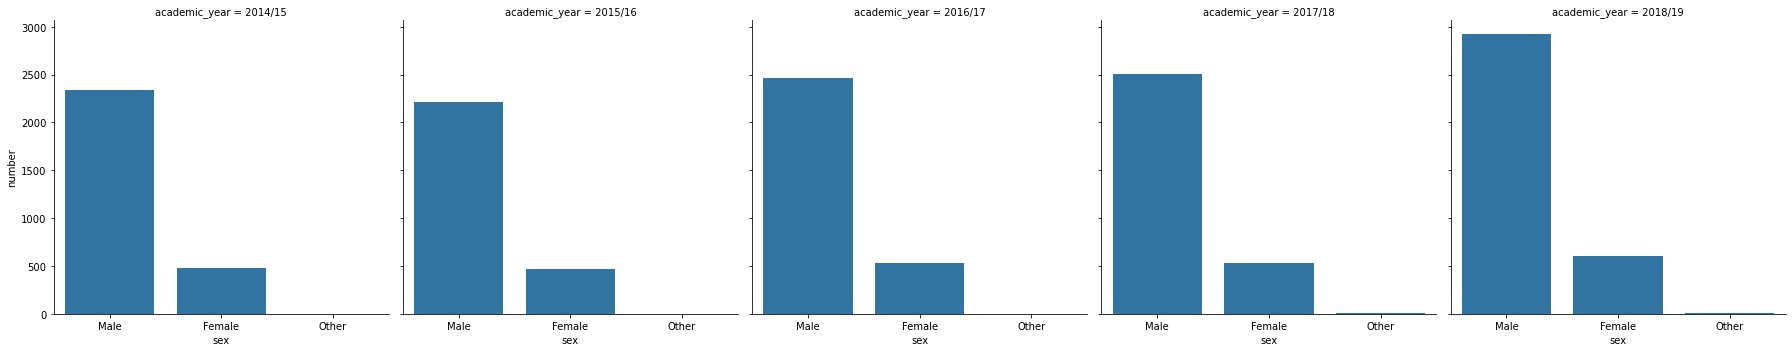

In [15]:
g = sns.FacetGrid(ft_ug_scotland, col="academic_year", col_wrap=5, height=5)
g.map(sns.barplot, "sex", "number", order=["Male", "Female", "Other"]);

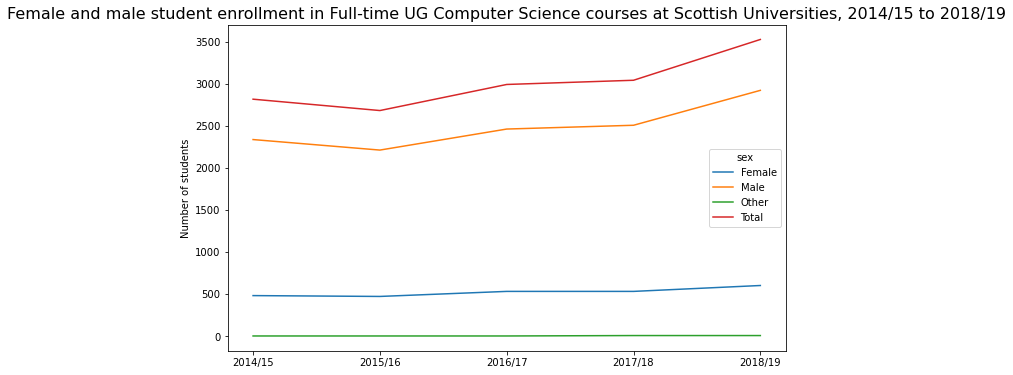

In [16]:
# plot a Stacked Bar Chart using matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(x="academic_year", y="number", hue="sex", data=ft_ug_scotland);
plt.xlabel("")
plt.ylabel("Number of students")
plt.title("Female and male student enrollment in Full-time UG Computer Science courses at Scottish Universities, 2014/15 to 2018/19", size=16)
plt.show()

### Conclusions

The number of females enrolling in full-time UG Computer Science courses has increased by approximately 25% between 2014/15 and 2018/19. However, the proportion of females enrolling in full-time UG Computer Science courses has remained steady at approximately 17%.

<strong>In 2020/19, 670 females enrolled in full-time UG Computer Science - 18.77% (3570 total enrollments).</strong>

The gender balance appears to have increased between 1-2%. However, there was a change in course definitions used by HESA, as they went from the Joint Academic Coding System (JACS) to the Higher Education Classification of Subjects (HECoS) in 2019/2020. this difference could be because courses which were previously not defined as Computer Science have now been added.